# Multiple Linear Regression

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
companies = pd.read_csv('/home/praveen/Desktop/Python/Machine learning/Linear Regression/datasets/1000_Companies.csv')
x = companies.iloc[:,:-1].values
y = companies.iloc[:,4].values

In [3]:
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


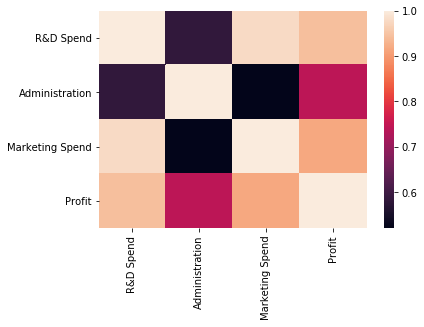

In [4]:
# building corelation matrix
sns.heatmap(companies.corr())

In [5]:
# encoding categorial data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

labelencoder = LabelEncoder()
x[:,3] = labelencoder.fit_transform(x[:,3])

onehotencoder = ColumnTransformer([("State", OneHotEncoder(), [0])], remainder = 'passthrough')
x = onehotencoder.fit_transform(x).toarray()
print(x)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.3689780e+05
  4.7178410e+05 2.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.5137759e+05
  4.4389853e+05 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0114555e+05
  4.0793454e+05 1.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.4192631e+05
  2.2714282e+05 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.2165214e+05
  2.8169232e+05 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.7093986e+05
  2.9544217e+05 2.0000000e+00]]


In [6]:
#avoiding dummy variable trap
x = x[:,1:]
print(x)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.3689780e+05
  4.7178410e+05 2.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.5137759e+05
  4.4389853e+05 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0114555e+05
  4.0793454e+05 1.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.4192631e+05
  2.2714282e+05 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.2165214e+05
  2.8169232e+05 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.7093986e+05
  2.9544217e+05 2.0000000e+00]]


In [7]:
# spliting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 0)
x_train

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.16125967e+05, 1.42843002e+05, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.29007753e+05, 3.11143877e+05, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.25420790e+05, 2.64280115e+05, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.13835527e+05, 1.12918344e+05, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.20317403e+05, 1.97604218e+05, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.27013716e+05, 2.85091731e+05, 0.00000000e+00]])

In [8]:
#fiting multiple linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
#predicting the test set results
y_pred = regressor.predict(x_test)
y_pred

array([ 59465.69818789,  57709.67333184,  66038.9108609 , 184076.81404502,
        77878.42604477, 112856.36115718, 185665.50784973,  61632.82494296,
       182432.07224976,  26370.54252862,  30050.90256966, 151733.46863055,
       107276.20658605,  20247.44414587, 172439.20106758,  67452.78918816,
       110112.69873619, 155775.20054334, 205989.94078625, 204933.28044091,
       144640.93491322,  54158.94512653, 190917.46419762,  52195.15900199,
        79060.45884672,  74202.38138629,  41351.55437405,  43711.6442756 ,
        32557.29917433, 252560.50145968, 113371.6771826 ,  87713.49433349,
       101157.63379001, 135497.14680163,  26212.8446375 ,  84021.31144208,
       210014.59028717, 178618.66019297, 182741.83726799, 109370.06254657,
        95031.99181416, 156905.73125657,  82561.45698263,  22470.59791326,
       107879.26511566,  19339.04118244, 161843.04333375,  58976.90481902,
       163531.65613578, 126712.60277132, 195924.73165751, 182696.52779897,
        64559.16447725,  

In [10]:
# cacluclting coefficient
print(regressor.coef_)

[ 1.72770743e+05 -5.65686268e-05  1.52509591e+04  1.52374147e+04
 -7.21595107e+04  1.51458647e+04 -4.40286822e-04  4.07083976e+04
  4.07056384e+04  1.49028185e+04  2.77613381e+04  2.77583282e+04
  1.48830035e+04  4.06080687e+04  1.47809191e+04  4.81046072e-07
  4.04385134e+04  1.46592706e+04  1.46183866e+04  2.74676258e+04
  4.03176172e+04  4.02717170e+04  2.22862582e-07  4.01982262e+04
  1.43387203e+04  1.43246744e+04  1.42747609e+04  5.60066837e-08
  3.99288436e+04  2.69439099e+04  2.69266033e+04  2.69012702e+04
  1.40254440e+04  1.40091405e+04  1.38235326e+04  2.66762832e+04
  1.38062258e+04  2.66411680e+04  2.66105678e+04  1.37369991e+04
  1.36206179e+04  1.36153505e+04  1.35772255e+04  1.35594172e+04
  3.91979491e+04  1.68380211e-07  3.90110869e+04  3.90073245e+04
  1.32784969e+04  3.89885129e+04 -1.95796019e-08  3.89476289e+04
  3.89253059e+04  3.89029826e+04  1.31407958e+04  2.59446360e+04
  2.59218113e+04  2.17587512e-08 -3.26839711e-09  3.85987359e+04
  3.85859441e+04 -1.76041

In [11]:
print(regressor.intercept_)

-289819.47086673736


In [12]:
# calculating the R square value
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.78959582241224